## EDA - Retail Sales


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
PROCESSED_PATH = Path('../data/processed')

In [3]:
df = pd.read_csv(
    PROCESSED_PATH / 'retail_sales.csv'
)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Categoría

#### Ventas totales

In [4]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [5]:
category_df = df.groupby(['Product Category'])['Total Amount'].sum().to_frame()
category_df

,Total Amount
Product Category,
Beauty,142015
Clothing,155580
Electronics,156875


In [6]:
category_df.index

Index(['Beauty', 'Clothing', 'Electronics'], dtype='object', name='Product Category')

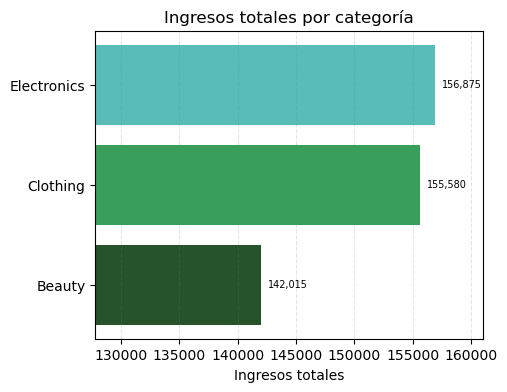

In [7]:
y_pos = np.arange(len(category_df.index))
left_lim = category_df['Total Amount'].min() * 0.9
right_lim = 161000
fig, ax = plt.subplots(figsize=(5,4))
barh = ax.barh(
    y_pos,
    category_df['Total Amount'],
    color = ['#26532B', '#399E5A', '#5ABCB9'],
    align = 'center'
)
ax.set_yticks(y_pos, labels = category_df.index)
ax.set_xlim(left = left_lim, right = right_lim)
ax.grid(axis='x', linestyle='--', alpha=0.2,  color = '#399E5A')
ax.bar_label(barh, fmt='{:,.0f}', padding=5, fontsize=7)
ax.set_xlabel('Ingresos totales')
ax.set_title('Ingresos totales por categoría')
plt.show()

El peso del importe se concentra principalmente en Electronics y Clothing, con una diferencia mínima entre ambas categorías. Por otro lado, Beauty presenta ingresos menores, lo cual se puede explicar por el tipo de producto que se comercializa. 

#### Ticket medio

In [8]:
beauty = df[df['Product Category'] == 'Beauty'] 
beauty['Total Amount'].mean()

np.float64(464.10130718954247)

In [9]:
clothing = df[df['Product Category'] == 'Clothing'] 
clothing['Total Amount'].mean()

np.float64(443.2478632478632)

In [10]:
electronics = df[df['Product Category'] == 'Electronics'] 
electronics['Total Amount'].mean()

np.float64(460.04398826979474)

In [11]:
category_df['Mean'] = [
    beauty['Total Amount'].mean(),
    clothing['Total Amount'].mean(),
    electronics['Total Amount'].mean()
]
category_df = category_df.sort_values(by = 'Mean', ascending=False)
category_df.head()

,Total Amount,Mean
Product Category,,
Beauty,142015,464.101307
Electronics,156875,460.043988
Clothing,155580,443.247863


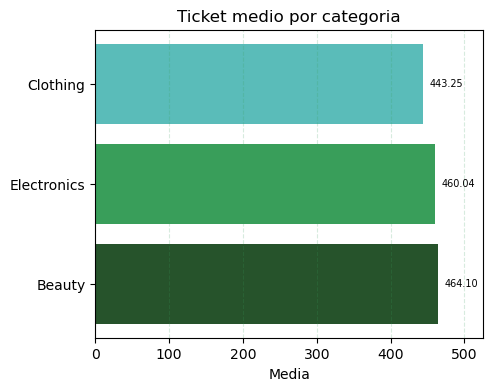

In [12]:
y_pos = np.arange(len(category_df.index))
right_lim = 525
fig, ax = plt.subplots(figsize = (5,4))
barh = ax.barh(
    y_pos,
    category_df['Mean'],
    color = ['#26532B', '#399E5A', '#5ABCB9'],
    align = 'center'
)
ax.set_yticks(y_pos, labels = category_df.index)
ax.set_xlim(right = right_lim)
ax.grid(axis='x', linestyle='--', alpha=0.2,  color = '#399E5A')
ax.bar_label(barh, fmt='{:,.2f}', padding=5, fontsize=7)
ax.set_xlabel('Media')
ax.set_title('Ticket medio por categoria')
plt.show()

A diferencia del importe total, observamos que en Beauty el ticket medio es superior. Esto sugiere que sus productos tienen un precio unitario más elevado, a pesar de contar con un menor número de tickets. 

En líneas generales, las tres categorías se manteienen en niveles muy similares de ticket medio, sin diferencias especiamente significatias entre ellas.

#### Cantidad media

In [13]:
category_df['Quantity mean'] = [beauty['Quantity'].mean(),
              clothing['Quantity'].mean(),
              electronics['Quantity'].mean()]
category_df

,Total Amount,Mean,Quantity mean
Product Category,,,
Beauty,142015,464.101307,2.509804
Electronics,156875,460.043988,2.547009
Clothing,155580,443.247863,2.486804


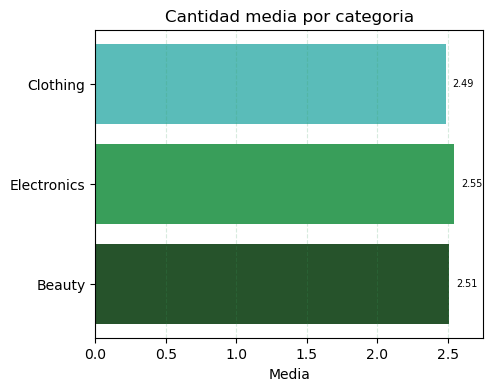

In [14]:
y_pos = np.arange(len(category_df.index))
fig, ax = plt.subplots(figsize = (5,4))
barh = ax.barh(
    y_pos,
    category_df['Quantity mean'],
    color = ['#26532B', '#399E5A', '#5ABCB9'],
    align = 'center'
)
ax.set_yticks(y_pos, labels = category_df.index)
ax.set_xlim(right = 2.75)
ax.grid(axis='x', linestyle='--', alpha=0.2,  color = '#399E5A')
ax.bar_label(barh, fmt='{:,.2f}', padding=5, fontsize=7)
ax.set_xlabel('Media')
ax.set_title('Cantidad media por categoria')
plt.show()

En la cantidad media por ticket observamos que las tres categorías presentan valores muy similares, con una media aproximada en torno a 2,5 productos por compra. No se aprecian diferencias relevantes en el volumen de unidades adquiridas entre ellas. 

### Ventas por mes

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['Month'] = df['Date'].dt.month
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


In [17]:
month_revenue = df.groupby(['Month'])['Total Amount'].sum().to_frame()
month_revenue

,Total Amount
Month,
1,35450
2,44060
3,28990
4,33870
5,53150
6,36715
7,35465
8,36960
9,23620


In [18]:
month_revenue['Total Amount']

Month
1     35450
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64

In [19]:
months = [
    'Enero',
    'Febrero',
    'Marzo',
    'Abril',
    'Mayo', 
    'Junio',
    'Julio',
    'Agosto',
    'Septiembre', 
    'Octubre',
    'Noviembre',
    'Diciembre'
]

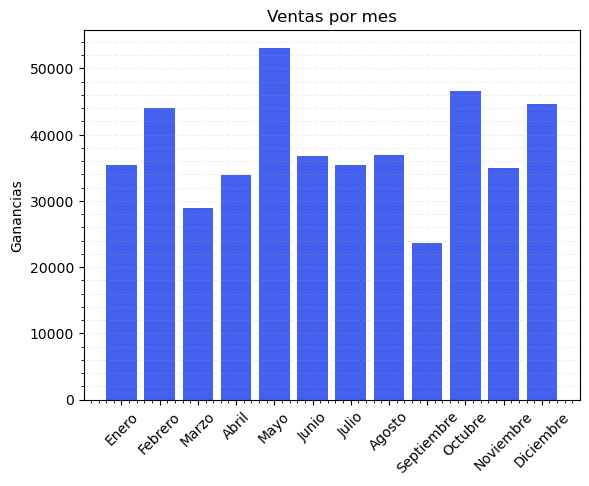

In [20]:
fig, ax = plt.subplots()
ax.bar(
    x = months,
    height = month_revenue['Total Amount'],
    color = '#4361EE'
)
ax.set_title('Ventas por mes')
ax.set_ylabel('Ganancias')
ax.minorticks_on()
ax.grid(axis='y', linestyle='--', alpha=0.2, which='both')
ax
plt.xticks(rotation = 45)
plt.show()

Destaca especiamente el pico de mayo, con un volumen muy superior al del resto de meses. Llama la atención sobre todo frente a periodos tradicionalmente fuertes como enero, junio o diciembre, que suelen verse impulsados por las rebajas y la campaña navideña, más propensa al consumo de regalos.

Sería interesante analizar qué acciones comerciales, promocionales o de surtido se llevaron a cabo en mayo para evaluar si pueden replicarse en meses mas rezagados, como por ejemplo septiembre, que presenta el importe más bajo del año.

### Ventas por género

In [21]:
gender_revenue = df.groupby(['Gender'])['Total Amount'].sum().to_frame()
gender_revenue

,Total Amount
Gender,
Female,232840
Male,221630


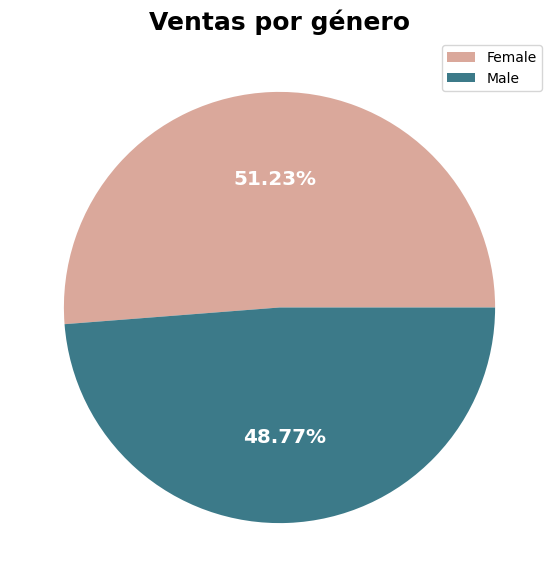

In [22]:
plt.figure(figsize = (9,7))
plt.pie(
    gender_revenue['Total Amount'],
    labels = gender_revenue.index,
    colors = ['#DAA89B', '#3C7A89'],
    autopct = '%.2f%%',
    textprops = {
        'size' : 'x-large',
        'fontweight' : 'bold',
        'color' : 'w'
    }
)
plt.legend()
plt.title('Ventas por género', fontsize = 18, fontweight = 'bold')
plt.show()

El promedio de compre entre hombre y mujer es aproximadamente similar, lo que indica que no existen diferencias significativas en el gasto total por género.

### Distribución de edad de clientes

In [23]:
customer_age_dist = df[['Age', 'Total Amount']]
customer_age_dist.head()

,Age,Total Amount
0,34,150
1,26,1000
2,50,30
3,37,500
4,30,100


In [24]:
bins = np.arange(df['Age'].min(), df['Age'].max() + 5.75, 5.75)
labels = [f"[{bins[i]}, {bins[i+1]})" for i in range(len(bins)-2)] + [f"[{bins[-2]}, {bins[-1]}]"]
centers = (bins[:-1] + bins[1:]) / 2
labels

['[18.0, 23.75)',
 '[23.75, 29.5)',
 '[29.5, 35.25)',
 '[35.25, 41.0)',
 '[41.0, 46.75)',
 '[46.75, 52.5)',
 '[52.5, 58.25)',
 '[58.25, 64.0]']

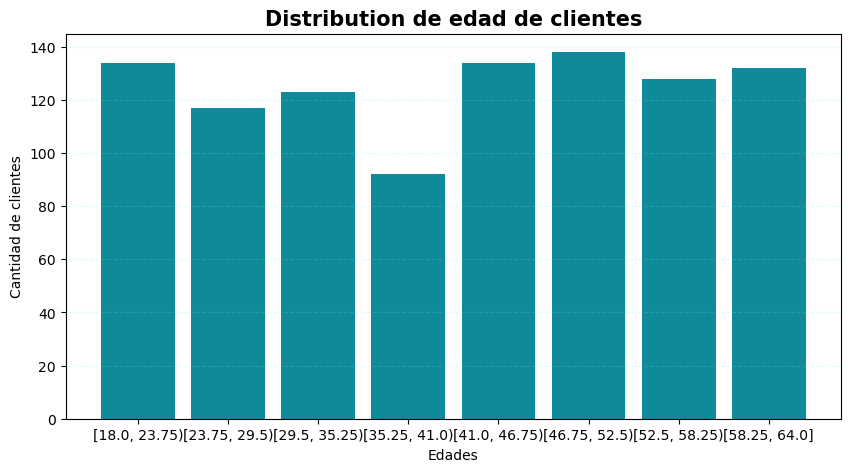

In [25]:
plt.figure(figsize = (10,5))
hist = plt.hist(
    customer_age_dist['Age'],
    bins = 8,
    color = '#108A99',
    rwidth = 0.82
)
plt.title('Distribution de edad de clientes', fontsize = 15, fontweight = 'bold')
plt.xticks(centers, labels)
plt.xlabel('Edades')
plt.ylabel('Cantidad de clientes')
plt.grid(color = "#5BECFF", linestyle = '--', axis = 'y', alpha = 0.2)
plt.show()

Los rangos de edad muestran una participación de compra bastante equilibrado en general. Sin embargo, se observa una ligera caída en la cantidad de clientes de entre 36 y 40 años, lo que podría indicar una menor participacion de este segmento en las compras

In [26]:
# Crea los rangos automáticamente
bins = [18, 25, 35, 45, 55, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']

df['Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,46-55
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-45
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,26-35
...,...,...,...,...,...,...,...,...,...,...,...
993,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,5,56+
994,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,11,46-55
995,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,10,18-25
996,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,12,36-45


### Grupo de edad

#### Revenue 

In [27]:
ag_df = df.groupby(['Group'])['Total Amount'].sum().to_frame()

/var/folders/wn/fl1h4hzx3hq52n50sv4tvjt80000gn/T/ipykernel_59371/3758431385.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ag_df = df.groupby(['Group'])['Total Amount'].sum().to_frame()


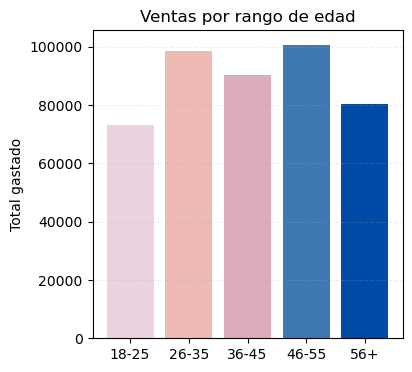

In [28]:
fig, ax = plt.subplots(figsize = (4,4))
ax.bar(
    x = ag_df.index,
    height = ag_df['Total Amount'],
    color = ['#EDD2E0', '#EDBBB4', '#DBABBE', '#3E78B2', '#004BA8']
)
ax.set_title('Ventas por rango de edad')
ax.set_ylabel('Total gastado')
ax.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

Los segmentos que más gastan son 26-35 años y 46-55 años, seguidos por el grupo 36-45 años. Los menores gastos se registran en los extremos: mayores de 56 años y 18-25 años. Esto indica que los compradores más activos económicamente se concentran en la edad adulta media, mientras que los segmentos más jóvenes y mayores muestran menor participación en el gasto.

#### Ticket medio

In [29]:
g1 = df[df['Group'] == '18-25'] 
g2 = df[df['Group'] == '26-35'] 
g3 = df[df['Group'] == '36-45'] 
g4 = df[df['Group'] == '46-55'] 
g5 = df[df['Group'] == '56+'] 
ag_df

,Total Amount
Group,
18-25,73335
26-35,98480
36-45,90370
46-55,100660
56+,80410


In [30]:
ag_df['Ticket medio'] = [
    g1['Total Amount'].mean(),
    g2['Total Amount'].mean(),
    g3['Total Amount'].mean(),
    g4['Total Amount'].mean(),
    g5['Total Amount'].mean()
]
ag_df.head()

,Total Amount,Ticket medio
Group,,
18-25,73335,495.506757
26-35,98480,480.390244
36-45,90370,449.601990
46-55,100660,441.491228
56+,80410,412.358974


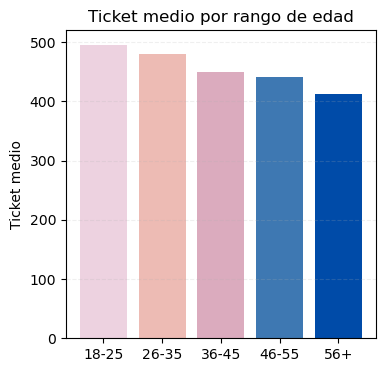

In [31]:
fig, ax = plt.subplots(figsize = (4,4))
ax.bar(
    x = ag_df.index,
    height = ag_df['Ticket medio'],
    color = ['#EDD2E0', '#EDBBB4', '#DBABBE', '#3E78B2', '#004BA8']
)
ax.set_title('Ticket medio por rango de edad')
ax.set_ylabel('Ticket medio')
ax.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

A pesar de que los jóvenes (18-25 años) tienen el importe más bajo, también presentan el ticket medio más alto, mientras que a medida que aumenta la edad, el ticket medio tiende a disminuir. Esto indica una tendencia descendente en el gasto promedio por compra conforme se avanza en los grupos de edad.

#### Cantidad promedio

In [32]:
ag_df['Cantidad media'] = [
        g1['Quantity'].mean(),
        g2['Quantity'].mean(),
        g3['Quantity'].mean(),
        g4['Quantity'].mean(),
        g5['Quantity'].mean()
    ]
ag_df

,Total Amount,Ticket medio,Cantidad media
Group,,,
18-25,73335,495.506757,2.418919
26-35,98480,480.390244,2.634146
36-45,90370,449.601990,2.502488
46-55,100660,441.491228,2.574561
56+,80410,412.358974,2.400000


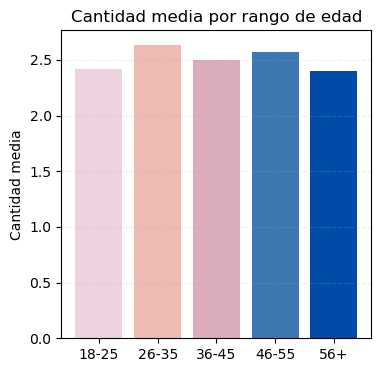

In [33]:
fig, ax = plt.subplots(figsize = (4,4))
ax.bar(
    x = ag_df.index,
    height = ag_df['Cantidad media'],
    color = ['#EDD2E0', '#EDBBB4', '#DBABBE', '#3E78B2', '#004BA8']
)
ax.set_title('Cantidad media por rango de edad')
ax.set_ylabel('Cantidad media')
ax.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

Los grupos de 26-35 y 46-55 años presentan valores ligeramente superiores, mientras que los extremos de edad (18-25 y 56+) muestran una menor cantidad media de productos por compra. Esto sugiere que, aunque los jóvenes compran artículos de mayor valor unitario, los adultos de mediana edad tienden a comprar más unidades por ticket.

### Distribución de ventas semanal

#### Total ventas

In [34]:
df['Weekday'] = df['Date'].dt.day_name()
weekday_df = df.groupby(['Weekday'])['Total Amount'].sum().to_frame().reset_index()
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_df['Weekday'] = pd.Categorical(weekday_df['Weekday'], categories=days_order, ordered=True)
weekday_df = weekday_df.sort_values(['Weekday'])

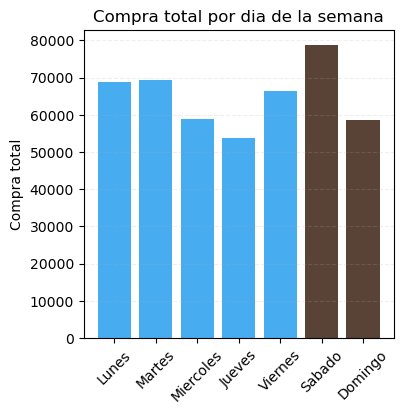

In [35]:
fig, ax = plt.subplots(figsize = (4,4))
ax.bar(
    x = weekday_df['Weekday'],
    height = weekday_df['Total Amount'],
    color = ['#48ACF0', '#48ACF0', '#48ACF0', '#48ACF0', '#48ACF0', '#594236', '#594236']
)
ax.set_title('Compra total por dia de la semana')
ax.set_ylabel('Compra total')
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.set_xticks(range(7), ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'], rotation = 45)
plt.show()

Observamos que el día con más compras es el sábado, mientras que el día con menor importe total es el jueves. Esto indica que el patrón de compra semanal tiene picos cercanos al fin de semana y menor actividad a mitad de semana.

#### Ticket medio

In [36]:
w1 = df[df['Weekday'] == 'Monday']
w2 = df[df['Weekday'] == 'Tuesday']
w3 = df[df['Weekday'] == 'Wednesday']
w4 = df[df['Weekday'] == 'Thursday']
w5 = df[df['Weekday'] == 'Friday']
w6 = df[df['Weekday'] == 'Saturday']
w7 = df[df['Weekday'] == 'Sunday']

In [41]:
weekday_df['Mean'] = [
    w1['Total Amount'].mean(),
    w2['Total Amount'].mean(),
    w3['Total Amount'].mean(),
    w4['Total Amount'].mean(),
    w5['Total Amount'].mean(),
    w6['Total Amount'].mean(),
    w7['Total Amount'].mean()
]
weekday_df

,Weekday,Total Amount,Mean,Quantity mean
1,Monday,68720,477.222222,2.645833
5,Tuesday,69440,431.304348,2.465839
6,Wednesday,58770,422.805755,2.561151
4,Thursday,53835,437.682927,2.447154
0,Friday,66290,463.566434,2.608392
2,Saturday,78815,525.433333,2.486667
3,Sunday,58600,424.637681,2.384058


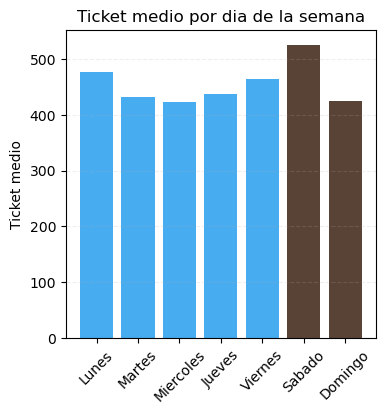

In [42]:
fig, ax = plt.subplots(figsize = (4,4))
ax.bar(
    x = weekday_df['Weekday'],
    height = weekday_df['Mean'],
    color = ['#48ACF0', '#48ACF0', '#48ACF0', '#48ACF0', '#48ACF0', '#594236', '#594236']
)
ax.set_title('Ticket medio por dia de la semana')
ax.set_ylabel('Ticket medio')
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.set_xticks(range(7), ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'], rotation = 45)
plt.show()

El ticket medio más alto se registra el sábado, mientras que los días entre semana, especialmente miércoles y jueves, presentan los valores más bajos. Esto indica que los consumidores tienden a gastar más por compra durante el fin de semana, coincidiendo con el mayor importe total registrado esos días.

#### Cantidad media

In [39]:
weekday_df['Quantity mean'] = [
    w1['Quantity'].mean(),
    w2['Quantity'].mean(),
    w3['Quantity'].mean(),
    w4['Quantity'].mean(),
    w5['Quantity'].mean(),
    w6['Quantity'].mean(),
    w7['Quantity'].mean()
]
weekday_df

,Weekday,Total Amount,Mean,Quantity mean
1,Monday,68720,463.566434,2.645833
5,Tuesday,69440,477.222222,2.465839
6,Wednesday,58770,422.805755,2.561151
4,Thursday,53835,437.682927,2.447154
0,Friday,66290,463.566434,2.608392
2,Saturday,78815,525.433333,2.486667
3,Sunday,58600,424.637681,2.384058


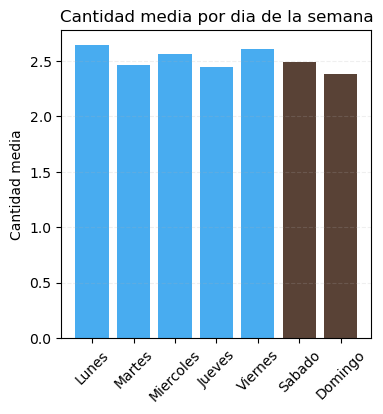

In [40]:
fig, ax = plt.subplots(figsize = (4,4))
ax.bar(
    x = weekday_df['Weekday'],
    height = weekday_df['Quantity mean'],
    color = ['#48ACF0', '#48ACF0', '#48ACF0', '#48ACF0', '#48ACF0', '#594236', '#594236']
)
ax.set_title('Cantidad media por dia de la semana')
ax.set_ylabel('Cantidad media')
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.set_xticks(range(7), ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'], rotation = 45)
plt.show()

En términos de unidades compradas por ticket, los días de lunes y viernes muestran la mayor cantidad media, mientras que jueves y domingo presentan la menor. Esto indica que, aunque los fines de semana (especialmente sábado) tienen tickets de mayor valor, los días entre semana tienden a incluir un poco más de unidades por compra.